<a href="https://colab.research.google.com/github/ishakale0908/BML/blob/main/heartdisease(bml).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
df=pd.read_csv("heart.csv")
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0


In [4]:
print("Null values: ", df.isnull().sum())
print("Duplicate values: ", df.duplicated().sum())
df.info()
df.describe()

Null values:  sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Duplicate values:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [5]:
# Encode labels in column 'famhist'.
label_encoder=preprocessing.LabelEncoder()
df['famhist']=label_encoder.fit_transform(df['famhist'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 36.2 KB


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
457,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [6]:
sns.set(style='whitegrid', context='notebook')
cols = ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age', 'chd']

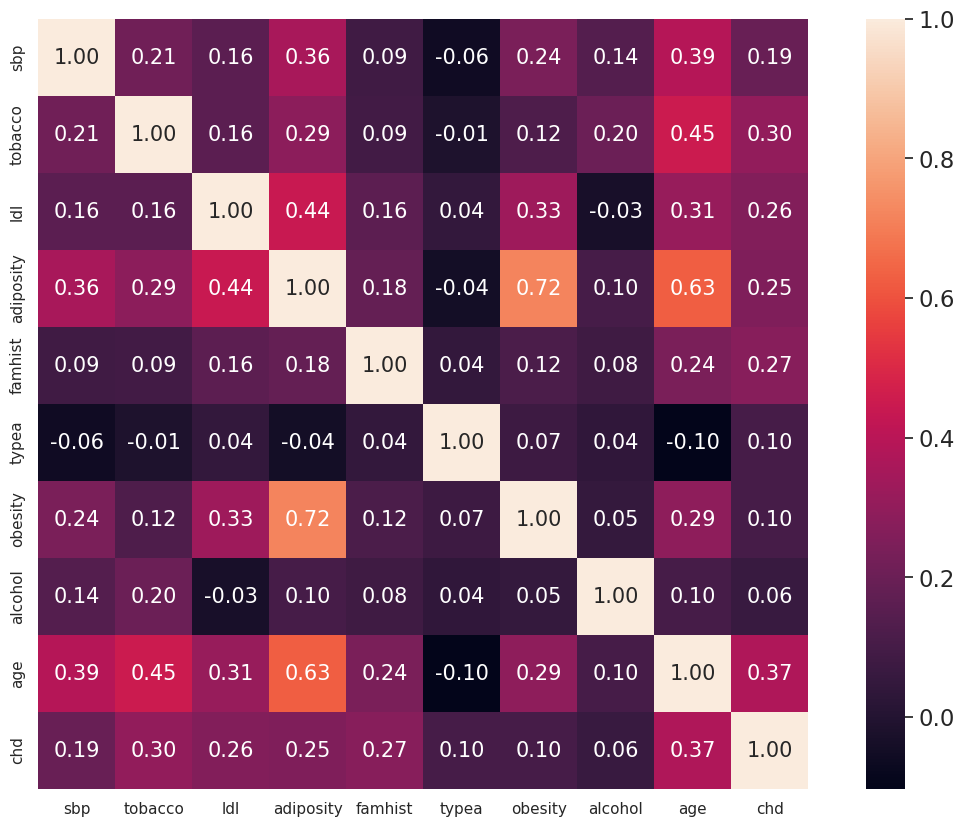

In [7]:
import numpy as np

f, ax = plt.subplots(figsize=(15, 10))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

In [18]:
X=df[['sbp','tobacco','ldl','adiposity','famhist','typea','obesity', 'alcohol','age']].values
y=df[['chd']].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
model=LogisticRegression(C=1, penalty='l2')
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [21]:
print ('Training Accuracy: %.2f' % model.score(X_train,y_train))
print ('Test Accuracy: %.2f' % model.score(X_test,y_test))


Training Accuracy: 0.72
Test Accuracy: 0.75


In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
model1=GaussianNB()
model1.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [24]:
print ('Training Accuracy: %.2f' % model1.score(X_train,y_train))
print ('Test Accuracy: %.2f' % model1.score(X_test,y_test))


Training Accuracy: 0.71
Test Accuracy: 0.70


In [25]:
expected = y_test
predicted = model1.predict(X_test)

In [26]:

print(classification_report(expected, predicted))
print(confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76        90
           1       0.57      0.61      0.59        49

    accuracy                           0.70       139
   macro avg       0.67      0.68      0.67       139
weighted avg       0.70      0.70      0.70       139

[[67 23]
 [19 30]]


In [27]:
import numpy as np
from collections import Counter


In [32]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [46]:
model2=DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [47]:
y_pred = model2.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.65


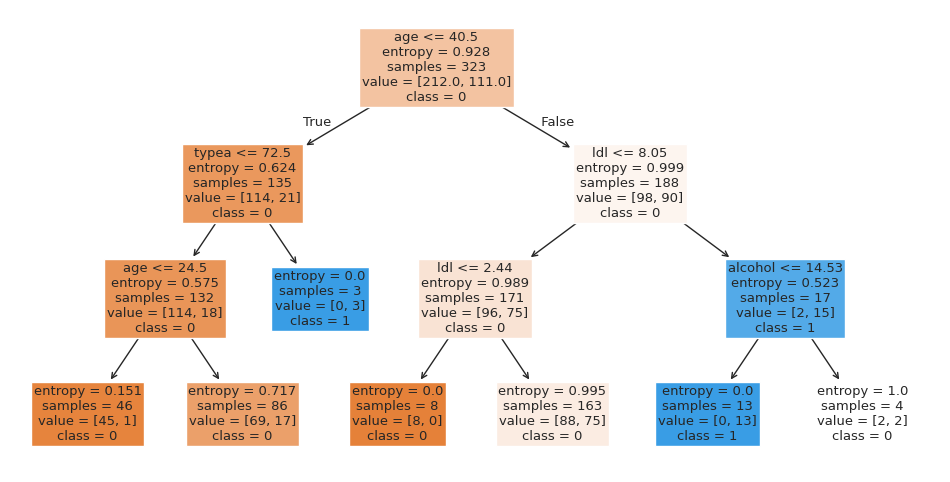

In [75]:
plt.figure(figsize=(12, 6))
# Convert class names to strings
class_names_str = [str(c) for c in np.unique(y)]
plot_tree(model2, feature_names=df.columns, class_names=class_names_str, filled=True)
plt.show()

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [60]:
y_pred = knn.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.65


In [62]:
from sklearn.cluster import KMeans

In [72]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_train)

In [73]:
print("Cluster Centers:\n", kmeans.cluster_centers_)

# Print the first 10 cluster labels
print("Cluster Labels:", y_kmeans[:10])

Cluster Centers:
 [[163.29487179   5.44935897   5.64769231  30.10858974   0.48717949
   51.76923077  28.03371795  10.14012821  54.30769231]
 [127.37435897   2.3465641    4.48097436  23.01117949   0.38461538
   54.02051282  25.17810256   7.60010256  38.07692308]
 [140.36         5.1222       4.2578      26.011        0.48
   52.98        26.744       55.8976      43.58      ]]
Cluster Labels: [1 0 1 1 1 0 2 1 2 1]
